In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
os.getcwd()

'C:\\Users\\Toufique\\2022 ML in textile\\data_clean_mega_2022\\June-july-aug-feb-jan\\all_data'

In [3]:
#present files
os.listdir()[1:10]

['1-08-2013.xlsx',
 '1.01.13.xlsx',
 '1.02.13.xlsx',
 '1.03.13.xlsx',
 '1.04.13.xlsx',
 '1.06.13.xlsx',
 '1.07.13.xlsx',
 '1.09.13.xlsx',
 '10.01.13.xlsx']

In [ ]:
raw_data = pd.read_excel('1-01-13.xlsx', header=[0,1,2])

In [16]:
raw_data.head()

Production summary                                                                \
                                                                                                                                               ID #   
                                                                                                                                 Unnamed: 0_level_2   
0                                                NaN                                                                                                  
1                                            13188-3                                                                                                  
2                                                NaN                                                                                                  
3                                                NaN                                                                                                  
4                                                NaN                                                                                                  

                                                                          \
        Construction Order Quantity                              Shrin.%   
  Unnamed: 1_level_2           F.F.  F.A         G.F. Unnamed: 5_level_2   
0                NaN            Yds  NaN          Yds                NaN   
1       30x30/110x62           5250  8.0  5706.521739               13.0   
2                NaN            NaN  NaN          NaN                NaN   
3                NaN            NaN  NaN          NaN                NaN   
4                NaN            NaN  NaN          NaN                NaN   

                                                        ...         \
             B.L.(m)                L #  Rec.           ...  TOTAL   
  Unnamed: 6_level_2 Unnamed: 7_level_2   B/L    B/L.1  ... Prodn.   
0                NaN                NaN   mtr      Yds  ...    Yds   
1        5997.824058               89.0  1750   1913.8  ...   1586   
2                NaN               81.0   860  940.496  ...    763   
3                NaN               89.0  1300  1421.68  ...   1160   
4                NaN              101.0   850   929.56  ...    769   

                                                      Date:- 01. August-13  \
              Shrin.% Grey(Inspected)Production        Unnamed: 16_level_1   
  Unnamed: 13_level_2                    Todays  Pre.                TOTAL   
0                 NaN                      Del.  Del.                 Del.   
1           17.128227                       NaN   NaN                  NaN   
2           18.872595                       NaN   NaN                  NaN   
3           18.406392                       NaN   NaN                  NaN   
4           17.272688                       NaN   NaN                  NaN   

                                                                    \
  Unnamed: 17_level_1 Unnamed: 18_level_1             Shrin.%  B/F   
                Rej.&               TOTAL Unnamed: 19_level_2  B/C   
0               C.Pcs              Prodn.                 NaN  D/C   
1                 NaN                 NaN                 NaN  B/F   
2                 NaN                 NaN                 NaN  B/F   
3                 NaN                 NaN                 NaN  B/F   
4                 NaN                 NaN                 NaN  B/F   

                       
              Remarks  
  Unnamed: 21_level_2  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 22 columns]

In [4]:
def raw_data_clean(data_path):
    df = pd.read_excel(data_path, header=[0,1])
    df['day'] =  df.columns[17][0].split(':-')[1].split('.')[0].strip()
    df.columns = ['ID #', 'Construction', 'F.F.Order_Qty', 'Fabric_Allownace',
       'G.F_Order_Qty', 'Shrin.%', 'B.L.(m)', 'L #', 'Rec_BL_M', 'Rec_BL-yds',
       'Today_pdn', 'Previous_pdn', 'TOTAL_pdn', 'act_shrink%', 'Today_del',
       'Pre_Del', 'Total_del',
       'Rej_and_cut', 'Total_del+rej', 'final_shrin.%', 'B/F',
       'Remarks', 'day']
    df= df.drop([0,1], axis=0)
    return df

In [5]:
def raw_data_combine(month, month_name, day):
    p = [f'{i}.{month}.13.xlsx' for i in range(day+1)]
    df2 = []
    for i in p:
        if i in os.listdir():
            d = raw_data_clean(i)
            df2.append(d)
            
        else:
            continue 
            
    df = pd.concat(df2)
    df['month'] = month_name
#     df['day'] =  df.columns[17][0].split(':-')[1].split('.')[0].strip()

    return df

In [6]:
def raw_data_combine_august(day):
    august_list = [f'{i}-08-2013.xlsx' for i in range(1,day+1)]
    august = []
    for i in august_list:
        if i in os.listdir():
            d = raw_data_clean(i)
            august.append(d)

        else:
            continue
    august = pd.concat(august)
    august['month'] = 'August'
    return august

In [217]:
# januray_data.head()

In [11]:
# januray_data = raw_data_combine('01', 'january', 31)

In [146]:
# januray_data.columns =
# januray_data.reset_index(1)

In [7]:
jan = raw_data_combine('01', 'January', 31)
feb = raw_data_combine('02', 'February', 28)
march = raw_data_combine('03', 'March',31)
april = raw_data_combine('04', 'April',30)
may = raw_data_combine('05', 'May', 31)
june = raw_data_combine('06', 'June', 30)
july = raw_data_combine('07', 'July', 31)
aug = raw_data_combine_august(31)
sept = raw_data_combine('09', 'September',30)

In [8]:
data = pd.concat([jan, feb, march,april, may, june, july, aug, sept])

In [10]:
data.head()

,ID #,Construction,F.F.Order_Qty,Fabric_Allownace,G.F_Order_Qty,Shrin.%,B.L.(m),L #,Rec_BL_M,Rec_BL-yds,...,Today_del,Pre_Del,Total_del,Rej_and_cut,Total_del+rej,final_shrin.%,B/F,Remarks,day,month
2,12207-8,40+40/2/40/110x80,31300,6,33297.87234,12.5,34797.651103,104.0,5260,5752.336,...,NaN,NaN,NaN,NaN,NaN,NaN,B/F,NaN,01,January
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,5380,5883.568,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01,January
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,2830,3094.888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01,January
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0,5390,5894.504,...,NaN,NaN,NaN,NaN,NaN,NaN,B/F,NaN,01,January
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.0,5350,5850.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01,January


In [229]:
data.shape

(117280, 24)

In [30]:
data.shape

(121148, 23)

In [ ]:
data.columns[1][0]

In [31]:
# data.columns = [data.columns[i][0] for i in range(data.columns.shape[0])]

In [12]:
data.head()

,ID,Construction,Req_Finish_Fabrics,Fabric_Allowance,Req_grey_fabric,assump_crimp%,Req_beam_length(yds),Loom_no,Rec_BL_m,Rec_Beam_length(yds),...,Today_del,pre_del,Total_del,Rej_and_cut_Piece,Total_pdn_per_order,waste%,Beam_status,Remarks,Month,day
2,12207-8,40+40/2/40/110x80,31300,6,33297.87234,12.5,34797.651103,104.0,5260,5752.336,...,NaN,NaN,NaN,NaN,NaN,NaN,B/F,NaN,01,January
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,5380,5883.568,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01,January
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,2830,3094.888,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01,January
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0,5390,5894.504,...,NaN,NaN,NaN,NaN,NaN,NaN,B/F,NaN,01,January
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.0,5350,5850.76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,01,January


In [33]:
data.columns

Index(['ID #', 'Construction', 'Order Quantity', 'Order Quantity',
       'Order Quantity', 'Shrin.%', 'B.L.(m)', 'L #', 'Rec.', 'Rec.', 'TODAYS',
       'Previous', 'TOTAL', 'Shrin.%', 'Grey(Inspected)Production',
       'Grey(Inspected)Production', 'Grey(Inspected)Production',
       'Grey(Inspected)Production', 'Grey(Inspected)Production', 'Shrin.%',
       'B/F', 'Remarks', 'month'],
      dtype='object')

In [13]:
#correcting the column names
data.columns = ['ID', 'Construction', 'Req_Finish_Fabrics', 'Fabric_Allowance',
       'Req_grey_fabric', 'assump_crimp%', 'Req_beam_length(yds)', 'Loom_no', 'Rec_BL_m', 'Rec_Beam_length(yds)', 'TODAYS_pdn',
       'Previous_pdn', 'Total_pdn_m/c', 'act_crimp%', 'Today_del', 'pre_del', 'Total_del',
       'Rej_and_cut_Piece', 'Total_pdn_per_order', 'waste%',
       'Beam_status', 'Remarks','day', 'Month']

In [19]:
def data_clean(data):
    data['ID'] = data['ID'].fillna(method='ffill')
    data['Construction']= data['Construction'].fillna(method='ffill')
    data['Req_Finish_Fabrics']= data['Req_Finish_Fabrics'].fillna(method='ffill')
    data['Fabric_Allowance'] = data['Fabric_Allowance'].fillna(method ='ffill')
    data['assump_crimp%'] = data['assump_crimp%'].fillna(method ='ffill')
    data['Req_grey_fabric'] = data['Req_Finish_Fabrics']*100/(100-data['Fabric_Allowance'])
    data['Req_beam_length(yds)']= data['Req_grey_fabric']*100/(100-data['assump_crimp%'])/1.0936    
    data['Rej_and_cut_Piece'] = data['Rej_and_cut_Piece'].fillna(0)
    data['Total_pdn_per_order'] = data['Total_pdn_per_order'].fillna(0)
    data['Rec_Beam_length(yds)'] = data['Rec_Beam_length(yds)'].fillna(method= 'ffill')
    data['act_crimp%'] = data['act_crimp%'].fillna('na')
    data = data[['ID', 'Construction','Req_Finish_Fabrics', 'Fabric_Allowance','Rec_Beam_length(yds)', 
                 'assump_crimp%','act_crimp%', 'Previous_pdn','Req_grey_fabric','Req_beam_length(yds)',
                 'Total_pdn_m/c', 'Rej_and_cut_Piece', 'Total_pdn_per_order', 'Month', 'day']]
    return data

In [20]:
data.columns

Index(['ID', 'Construction', 'Req_Finish_Fabrics', 'Fabric_Allowance',
       'Req_grey_fabric', 'assump_crimp%', 'Req_beam_length(yds)', 'Loom_no',
       'Rec_BL_m', 'Rec_Beam_length(yds)', 'TODAYS_pdn', 'Previous_pdn',
       'Total_pdn_m/c', 'act_crimp%', 'Today_del', 'pre_del', 'Total_del',
       'Rej_and_cut_Piece', 'Total_pdn_per_order', 'waste%', 'Beam_status',
       'Remarks', 'day', 'Month'],
      dtype='object')

In [21]:
data_1= data_clean(data)

In [22]:
data_1.head()

,ID,Construction,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),assump_crimp%,act_crimp%,Previous_pdn,Req_grey_fabric,Req_beam_length(yds),Total_pdn_m/c,Rej_and_cut_Piece,Total_pdn_per_order,Month,day
2,12207-8,40+40/2/40/110x80,31300,6.0,5752.336,12.5,12.261732,5047,33297.87234,34797.651103,5047,0,0,January,01
3,12207-8,40+40/2/40/110x80,31300,6.0,5883.568,12.5,64.120411,1952,33297.87234,34797.651103,2111,0,0,January,01
4,12207-8,40+40/2/40/110x80,31300,6.0,3094.888,12.5,24.132957,2207,33297.87234,34797.651103,2348,0,0,January,01
5,12207-8,40+40/2/40/110x80,31300,6.0,5894.504,12.5,14.734132,5026,33297.87234,34797.651103,5026,0,0,January,01
6,12207-8,40+40/2/40/110x80,31300,6.0,5850.760,12.5,21.463195,4391,33297.87234,34797.651103,4595,0,0,January,01


In [24]:
import seaborn as sns

In [27]:
pdn_per_month = data_1.pivot_table(values='Total_pdn_m/c', index='Month').reset_index()

In [30]:
pdn_per_month

,Month,Total_pdn_m/c
0,April,4880.367138
1,August,2558.693869
2,February,3894.191759
3,January,3612.231692
4,July,2560.562649
5,June,3982.265960
6,March,4178.179021
7,May,4073.804591
8,September,4313.060748


<AxesSubplot:xlabel='Month', ylabel='Total_pdn_m/c'>

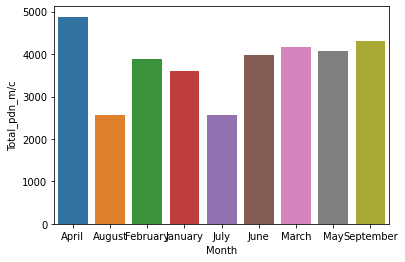

In [29]:
sns.barplot(x='Month', y= 'Total_pdn_m/c', data= pdn_per_month)

In [32]:
april = data_1[data_1['Month'] =='April']

<AxesSubplot:xlabel='day'>

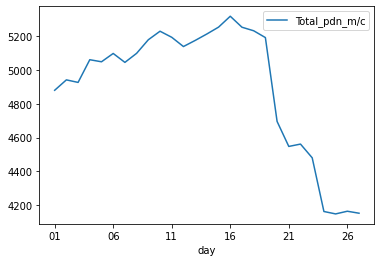

In [35]:
april.pivot_table(values='Total_pdn_m/c', index='day'  ).plot()

In [36]:
may = data_1[data_1['Month'] =='May']

<AxesSubplot:xlabel='day'>

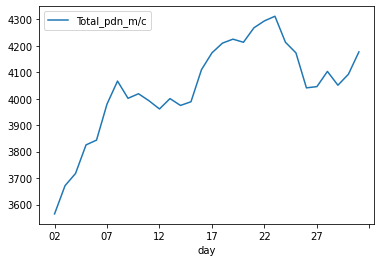

In [37]:
may.pivot_table(values='Total_pdn_m/c', index='day'  ).plot()

<AxesSubplot:xlabel='day'>

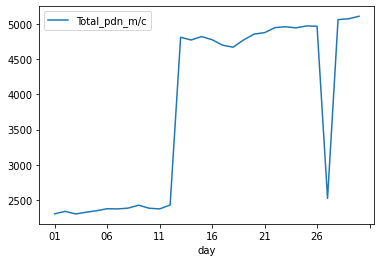

In [38]:
june = data_1[data_1['Month'] =='June']
june.pivot_table(values='Total_pdn_m/c', index='day'  ).plot()

In [39]:
data_1.head()

,ID,Construction,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),assump_crimp%,act_crimp%,Previous_pdn,Req_grey_fabric,Req_beam_length(yds),Total_pdn_m/c,Rej_and_cut_Piece,Total_pdn_per_order,Month,day
2,12207-8,40+40/2/40/110x80,31300,6.0,5752.336,12.5,12.261732,5047,33297.87234,34797.651103,5047,0,0,January,01
3,12207-8,40+40/2/40/110x80,31300,6.0,5883.568,12.5,64.120411,1952,33297.87234,34797.651103,2111,0,0,January,01
4,12207-8,40+40/2/40/110x80,31300,6.0,3094.888,12.5,24.132957,2207,33297.87234,34797.651103,2348,0,0,January,01
5,12207-8,40+40/2/40/110x80,31300,6.0,5894.504,12.5,14.734132,5026,33297.87234,34797.651103,5026,0,0,January,01
6,12207-8,40+40/2/40/110x80,31300,6.0,5850.760,12.5,21.463195,4391,33297.87234,34797.651103,4595,0,0,January,01


In [39]:
def construction_warp_count(x):
    try: 
        if '+' in x.split('/')[0]:
            return 'double'
        elif 'x' in x.split('/')[0]:
            return int(x.split('/')[0].split('x')[0])
    except :
        return 'N/A'

In [40]:
def construction_weft_count(x): 
    try:
        return int(x.split('x')[1].split('/')[0])
    except Exception:
        if 'z40' in x.split('/')[1].split('x')[0]:
            return int(x.split('/')[1].split('x')[0].strip('z'))
    except:
         return int(x.split('x')[1].split('/')[0])

In [41]:
data_2 = data_1.copy()

In [42]:
data_2['warp_count']= data_2['Construction'].apply(lambda x: construction_warp_count(x))
data_2['weft_count']= data_2['Construction'].apply(lambda x: construction_weft_count(x))

In [43]:
data_2.head()

,ID,Month,Construction,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),assump_crimp%,act_crimp%,Previous_pdn,Req_grey_fabric,Req_beam_length(yds),Total_pdn_m/c,Rej_and_cut_Piece,Total_pdn_per_order,warp_count,weft_count
0,12207-8,January,40+40/2/40/110x80,31300.0,6.0,5752.336,12.5,12.261732,5047,33297.87234,34797.651103,5047.0,0.0,0.0,double,80.0
1,12207-8,January,40+40/2/40/110x80,31300.0,6.0,5883.568,12.5,64.120411,1952,33297.87234,34797.651103,2111.0,0.0,0.0,double,80.0
2,12207-8,January,40+40/2/40/110x80,31300.0,6.0,3094.888,12.5,24.132957,2207,33297.87234,34797.651103,2348.0,0.0,0.0,double,80.0
3,12207-8,January,40+40/2/40/110x80,31300.0,6.0,5894.504,12.5,14.734132,5026,33297.87234,34797.651103,5026.0,0.0,0.0,double,80.0
4,12207-8,January,40+40/2/40/110x80,31300.0,6.0,5850.760,12.5,21.463195,4391,33297.87234,34797.651103,4595.0,0.0,0.0,double,80.0


In [44]:
def construction_to_epi(x):
    return x.split('/')[-1].split('x')[0]
def construction_to_ppi(x):
    try:
        return x.split('/')[-1].split('x')[1]
    except:
        return x.split('/')[-1]

In [ ]:
# data_1 = data_1.copy()

In [45]:
data_2['epi']= data_2['Construction'].apply(lambda x: construction_to_epi(x))
data_2['epi'] = data_2['epi'].replace('2', '140')
data_2['ppi']= data_2['Construction'].apply(lambda x: construction_to_ppi(x))
data_2['ppi'] = data_2['ppi'].replace('40100', '70')
data_2['ppi'] = data_2['ppi'].replace('40120', '80')
data_2['ppi'] = data_2['ppi'].replace('40140', '88')

In [46]:
data_2.head()

,ID,Month,Construction,Req_Finish_Fabrics,Fabric_Allowance,Rec_Beam_length(yds),assump_crimp%,act_crimp%,Previous_pdn,Req_grey_fabric,Req_beam_length(yds),Total_pdn_m/c,Rej_and_cut_Piece,Total_pdn_per_order,warp_count,weft_count,epi,ppi
0,12207-8,January,40+40/2/40/110x80,31300.0,6.0,5752.336,12.5,12.261732,5047,33297.87234,34797.651103,5047.0,0.0,0.0,double,80.0,110,80
1,12207-8,January,40+40/2/40/110x80,31300.0,6.0,5883.568,12.5,64.120411,1952,33297.87234,34797.651103,2111.0,0.0,0.0,double,80.0,110,80
2,12207-8,January,40+40/2/40/110x80,31300.0,6.0,3094.888,12.5,24.132957,2207,33297.87234,34797.651103,2348.0,0.0,0.0,double,80.0,110,80
3,12207-8,January,40+40/2/40/110x80,31300.0,6.0,5894.504,12.5,14.734132,5026,33297.87234,34797.651103,5026.0,0.0,0.0,double,80.0,110,80
4,12207-8,January,40+40/2/40/110x80,31300.0,6.0,5850.760,12.5,21.463195,4391,33297.87234,34797.651103,4595.0,0.0,0.0,double,80.0,110,80


In [47]:
data_2.shape

(121148, 18)

In [48]:
data_2.isna().sum()

ID                          0
Month                       0
Construction                0
Req_Finish_Fabrics          0
Fabric_Allowance            0
Rec_Beam_length(yds)        0
assump_crimp%               0
act_crimp%                  0
Previous_pdn            13637
Req_grey_fabric             0
Req_beam_length(yds)        0
Total_pdn_m/c           13630
Rej_and_cut_Piece           0
Total_pdn_per_order         0
warp_count               1013
weft_count                806
epi                         0
ppi                         0
dtype: int64

In [50]:
data_2.shape

(121148, 18)

In [52]:
data_2.to_csv('weaving_dataset_with_month_full_121148_r_18_c.csv', index=False)

In [49]:
data_2[data_2['warp_count'].isna()]['Construction'].apply(lambda x: x.split('x')[0]).value_counts()

80/2          627
40c40/120     160
40/2/          93
40/40          64
60/160/160     36
40/2           33
Name: Construction, dtype: int64

In [184]:
def fill_warp_count(data):
    return data['Construction'].apply(lambda x: x.split('x')[0])

In [175]:
data_1['warp_count'].apply(lambda x: if x==None else x )

601    None
602    None
603    None
609    None
610    None
       ... 
90     None
239    None
240    None
241    None
242    None
Name: warp_count, Length: 1013, dtype: object

In [166]:
def warp_count_clean(x):
    if x == 501:
        return 50
    elif x== 40100:
        return 100
    elif x == 40140:
        return 140
    elif x == 40120:
        return 120
    elif x== 501:
        return 50
    else:
        return x

In [167]:
data_1['weft_count'] = data_1['weft_count'].apply(lambda x: warp_count_clean(x))

C:\Users\Toufique\AppData\Local\Temp/ipykernel_21620/1192968622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['weft_count'] = data_1['weft_count'].apply(lambda x: warp_count_clean(x))


In [169]:
data_1['warp_count'] = data_1['warp_count'].apply(lambda x: warp_count_clean(x))

C:\Users\Toufique\AppData\Local\Temp/ipykernel_21620/3016176375.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_1['warp_count'] = data_1['warp_count'].apply(lambda x: warp_count_clean(x))


In [170]:
data_1.isna().sum()

ID                          0
Month                       0
Construction                0
Req_Finish_Fabrics          0
Fabric_Allowance            0
Rec_Beam_length(yds)        0
assump_crimp%               0
act_crimp%                  0
Previous_pdn            13637
Req_grey_fabric             0
Req_beam_length(yds)        0
Total_pdn_m/c           13630
Rej_and_cut_Piece           0
Total_pdn_per_order         0
warp_count               1013
weft_count                806
epi                         0
ppi                         0
dtype: int64

In [139]:
data_1[data_1['Previous_pdn'].notna()].shape

(107511, 14)

In [146]:
data_1['Total_pdn_per_order'].describe()

count    121148.000000
mean       1627.604971
std       18501.170618
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      924098.000000
Name: Total_pdn_per_order, dtype: float64

In [13]:
data.head()

,Unnamed: 0,Unnamed: 1,F.F.,F.A,G.F.,Unnamed: 5,Unnamed: 6,Unnamed: 7,B/L,B/L.1,...,Prodn..2,Unnamed: 13,Todays,Pre.,TOTAL,Rej.&,TOTAL.1,Unnamed: 19,B/C,Unnamed: 21
1,12207-8,40+40/2/40/110x80,31300,6.0,33297.87234,12.5,34797.651103,104.0,5260,5752.336,...,5047,12.261732,NaN,NaN,NaN,NaN,NaN,NaN,B/F,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.0,5380,5883.568,...,2111,64.120411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.0,2830,3094.888,...,2348,24.132957,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0,5390,5894.504,...,5026,14.734132,NaN,NaN,NaN,NaN,NaN,NaN,B/F,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.0,5350,5850.76,...,4595,21.463195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
# df= data_clean(data)

In [ ]:
#primary data transforming

In [111]:
def data_clean(data):
#     data = pd.read_excel(data_path, header=2)
    data = data.drop(0, axis=0)
    data = data.rename(columns={'construction':'Construction', ' F.F.':'Req_Finish_Fabrics',
                                'F.A':'Fabric_Allowance', 'yarn_shrinkage':'Shrink_allow', 
                      'B/L.1': 'Rec_Beam_length(yds)', 'Prodn..1':'Previous_pdn', 
                      'Prodn..2': 'Total_Pdn(yds)', 'Rej.&':'Rejection'})   
    data['Construction']= data['Construction'].fillna(method='ffill')
    data['Req_Finish_Fabrics']= data['Req_Finish_Fabrics'].fillna(method='ffill')
    data['Fabric_Allowance'] = data['Fabric_Allowance'].fillna(method ='ffill')
    data['Shrink_allow'] = data['Shrink_allow'].fillna(method ='ffill')
    data['Req_grey_fabric'] = data['Req_Finish_Fabrics']*100/(100-data['Fabric_Allowance'])
    data['Req_beam_length(yds)']= data['Req_grey_fabric']*100/(100-data['Shrink_allow'])/1.0936                         
    data = data[['ID','month', 'Construction','Req_Finish_Fabrics', 'Fabric_Allowance','Rec_Beam_length(yds)', 
                 'Shrink_allow', 'Previous_pdn','Req_grey_fabric','Req_beam_length(yds)', 'Total_Pdn(yds)', 'Rejection']]
    return data

In [83]:
def data_clean(data_path):
    data = pd.read_excel(data_path, header=2)
    data = data.drop(0, axis=0)
    data = data.rename(columns={'Unnamed: 0':'ID','Unnamed: 1':'Construction', ' F.F.':'Req_Finish_Fabrics',
                                'F.A':'Fabric_Allowance', 'Unnamed: 5':'Shrink_allow', 
                      'B/L.1': 'Rec_Beam_length(yds)', 'Prodn..1':'Previous_pdn', 
                      'Prodn..2': 'Total_Pdn(yds)', 'Rej.&':'Rejection'})   
    data['Construction']= data['Construction'].fillna(method='ffill')
    data['Req_Finish_Fabrics']= data['Req_Finish_Fabrics'].fillna(method='ffill')
    data['Fabric_Allowance'] = data['Fabric_Allowance'].fillna(method ='ffill')
    data['Shrink_allow'] = data['Shrink_allow'].fillna(method ='ffill')
    data['Req_grey_fabric'] = data['Req_Finish_Fabrics']*100/(100-data['Fabric_Allowance'])
    data['Req_beam_length(yds)']= data['Req_grey_fabric']*100/(100-data['Shrink_allow'])/1.0936                         
    data = data[['ID','month', 'Construction','Req_Finish_Fabrics', 'Fabric_Allowance','Rec_Beam_length(yds)', 
                 'Shrink_allow', 'Previous_pdn','Req_grey_fabric','Req_beam_length(yds)', 'Total_Pdn(yds)', 'Rejection']]
    return data

In [ ]:
data_clean()

In [ ]:
#combining all files 

In [84]:
def month_data_clean(month):
    p = [f'{i}.{month}.13.xlsx' for i in range(1,31)]
    df2 = []
    for i in p:
        if i in os.listdir():
            d = data_clean(i)
            df2.append(d)
        else:
            continue
    df = pd.concat(df2)
    return df

In [ ]:
#retrieving all data according to month

In [41]:
data.shape

(121148, 11)

In [27]:
# april = pd.read_excel('april-13.xlsx', header=[0,1])